In [ ]:
import pandas as pd


In [ ]:
df=pd.read_csv("Activities.csv")
#df.head()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df=df[df["Tevékenység típusa"].isin(["Futás", "Labdarúgás"])]
df

,Tevékenység típusa,Dátum,Kedvenc,Cím,Távolság,Kalóriaszám,Idő,Átlagos pulzusszám,Max. pulzus,Átl. pedálütem,...,Max. légzés,Stresszadatok változása,Kezdő stressz,Befejező stressz,Átl. stressz,Max. stressz,Menetidő,Eltelt idő,Minimális magasság,Maximális magasság
0,Futás,2024-08-09 18:31:09,False,Bp Futás,3.40,368,01:01:34,123,167,43,...,--,--,--,--,--,--,00:24:57,01:01:34,97,104
1,Futás,2024-08-08 19:31:50,False,Szeged Futás,3.18,278,01:00:51,108,145,47,...,--,--,--,--,--,--,00:29:41,01:00:51,81,90
2,Futás,2024-08-07 19:46:11,False,Bp Futás,3.02,286,00:31:41,150,176,70,...,--,--,--,--,--,--,00:23:28,00:31:41,98,101
3,Futás,2024-08-07 18:32:26,False,Bp Futás,3.19,294,00:30:30,155,182,78,...,--,--,--,--,--,--,00:23:08,00:30:30,98,101
4,Futás,2024-08-06 18:13:41,False,Bp Futás,5.77,589,01:27:29,135,171,57,...,--,--,--,--,--,--,00:46:51,01:27:29,100,107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,Futás,2022-01-10 17:19:44,False,Szeged Futás,6.61,503,00:55:22,159,184,115,...,--,--,--,--,--,--,00:39:41,00:55:22,76,80
667,Futás,2022-01-07 11:49:52,False,Szeged - 3x1k,8.10,505,00:53:07,165,186,143,...,--,--,--,--,--,--,00:51:21,00:54:26,73,82
671,Futás,2022-01-04 13:47:13,False,Szeged - piramis,3.76,215,00:25:47,157,185,142,...,--,--,--,--,--,--,00:25:27,00:27:25,76,82
673,Futás,2022-01-03 13:45:35,False,Szeged Futás,7.89,509,00:55:59,162,187,132,...,--,--,--,--,--,--,00:51:15,01:00:22,73,82


,Kalóriaszám
73,--
401,1
64,"1,018"
63,"1,160"
307,106
...,...
116,840
173,842
273,86
27,94


In [ ]:
df["Dátum"]=pd.to_datetime(df["Dátum"])
df["Kalóriaszám"]= df['Kalóriaszám'].str.replace('--', '0')
df["Kalóriaszám"]= df['Kalóriaszám'].str.replace(',', '').astype(float)



In [ ]:
df["acute_workload"]=df['Kalóriaszám'].rolling(window=7, min_periods=1).sum()
df["chronic_workload"]=df['acute_workload'].rolling(window=35, min_periods=1).mean()
#df

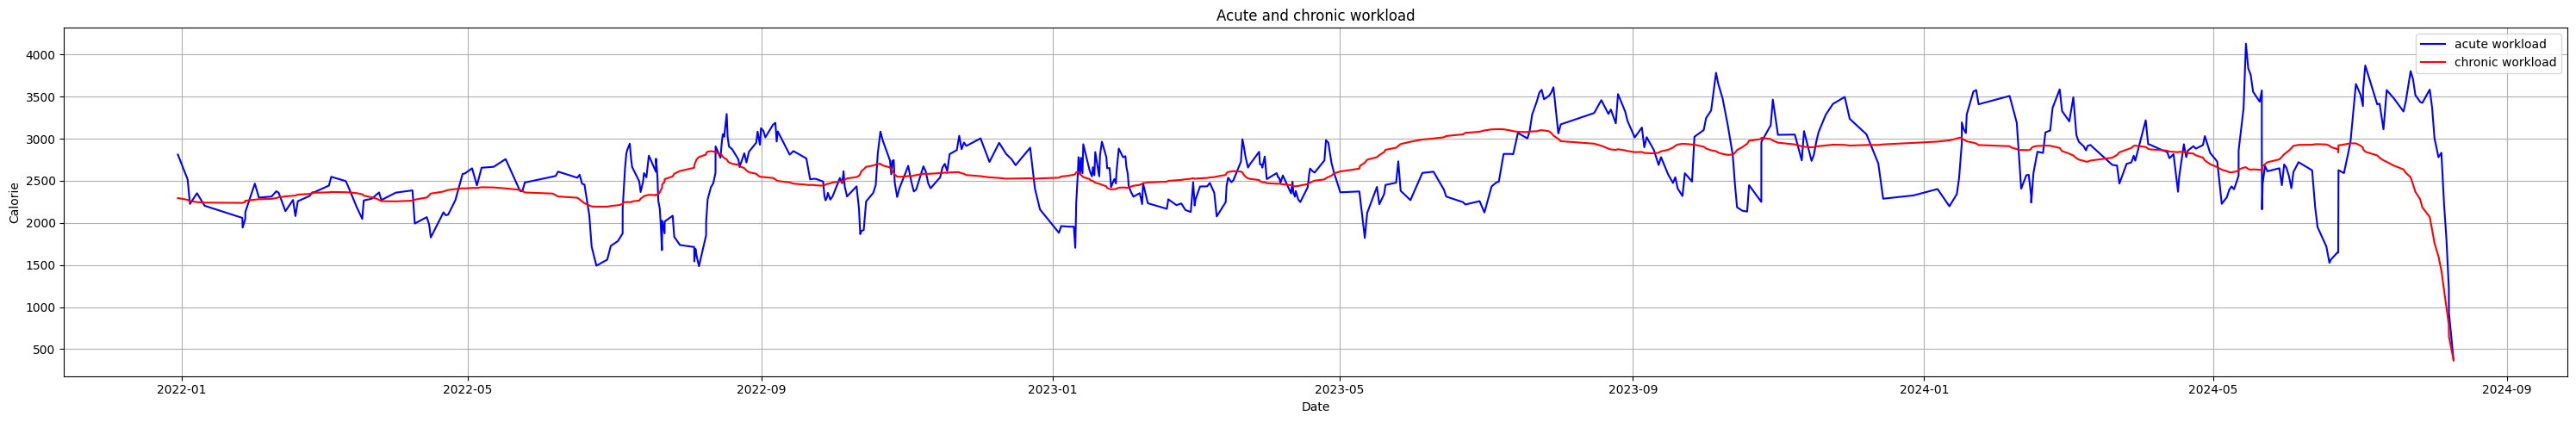

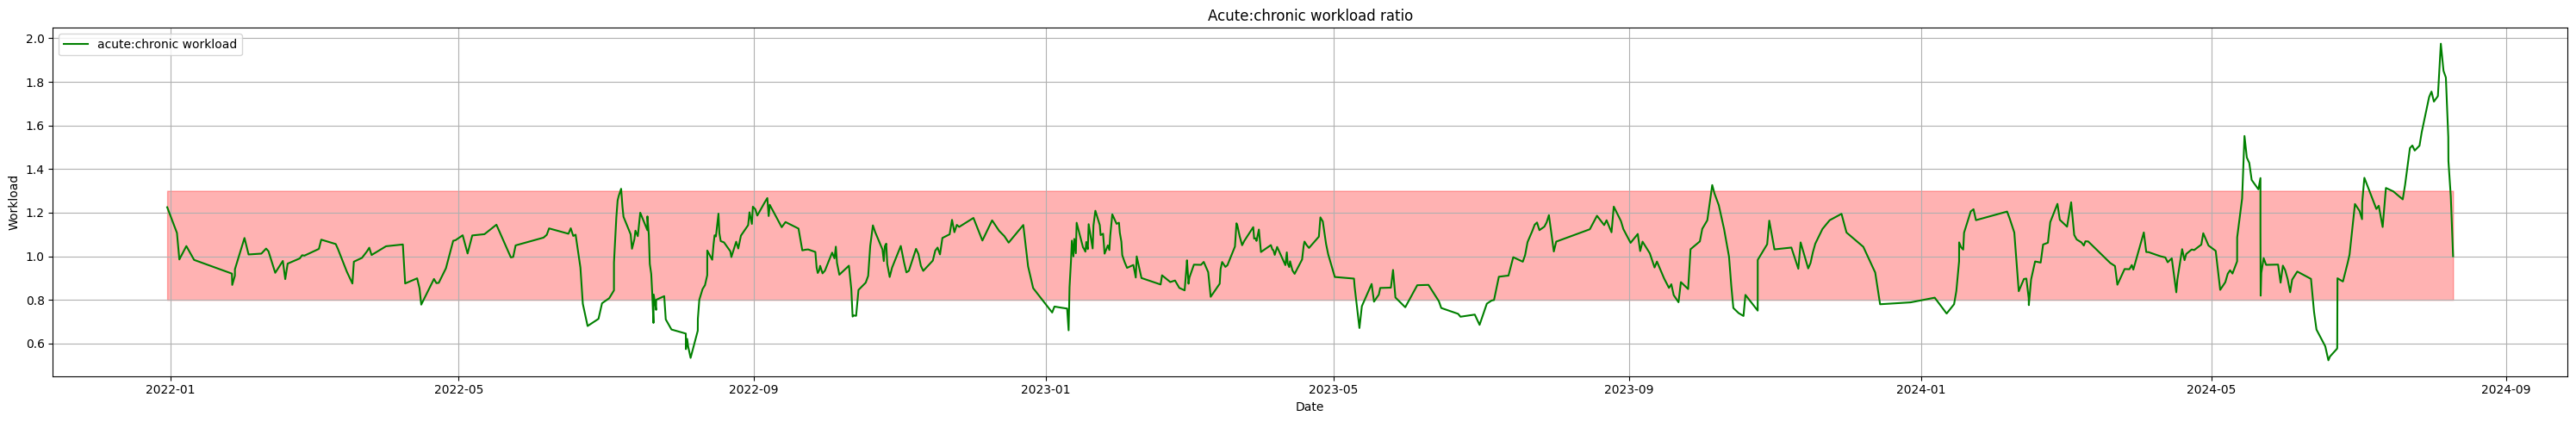

In [ ]:
plt.figure(figsize=(30, 5))
plt.plot(df['Dátum'], df['acute_workload'],
         label='acute workload',
         color='blue')
plt.plot(df['Dátum'], df['chronic_workload'],
         label="chronic workload",
         color="red")

plt.title(f"Acute and chronic workload")
plt.xlabel("Date")
plt.ylabel("Calorie")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(30, 5))
plt.plot(df['Dátum'], df['acute_workload']/df["chronic_workload"],
         label='acute:chronic workload',
         color='green')
plt.fill_between(df["Dátum"], 0.8,1.3,
         color="red",
                 alpha=0.3)

plt.title(f"Acute:chronic workload ratio")
plt.xlabel("Date")
plt.ylabel("Workload")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()